<a href="https://colab.research.google.com/github/varunkr24/CNN-Image-Classification-1/blob/Python/CNN_Plant_Seedling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPool2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K


In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/

/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1


In [5]:
import os
os.chdir('./train')

In [6]:
os.getcwd()

'/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train'

In [8]:
!ls "/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/"

'Seedling - Prediction'   test	 train


In [9]:
pathToTrain = '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/'

listing = os.listdir( pathToTrain ) 
num_folders = len(listing)
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/' + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

12
Black-grass
Scentless Mayweed
Maize
Charlock
Common Chickweed
Common wheat
Loose Silky-bent
Cleavers
Shepherds Purse
Fat Hen
Sugar beet
Small-flowered Cranesbill
1272.6329414844513  seconds


In [129]:
cd /content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/

/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1


In [130]:
os.chdir('./test')

pathToTest = '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/test/'

listing = os.listdir( pathToTest) #if m.endswith('.mp3')

In [132]:
listing


['fef2ade8c.png',
 'fdea6b119.png',
 'Test Data Annotation.csv',
 'fea3da57c.png',
 'fea1d13d6.png',
 'fe29629fb.png',
 'fe9e87b78.png',
 'fea355851.png',
 'ffc6f8527.png',
 'fa5fd1384.png',
 'fd87b36ae.png',
 'f66ae4070.png',
 'f48916a8c.png',
 'fc3e58836.png',
 'fbf88b6be.png',
 'f593c9cf0.png',
 'ff65bc002.png',
 'f9ea23fb5.png',
 'fa9f3a8f9.png',
 'fc6f686fb.png',
 'fb022edf9.png',
 'fd925f542.png',
 'fba8fc78a.png',
 'fd253a74e.png',
 'fda0b5c38.png',
 'fda39e16f.png',
 'f4e7733d4.png',
 'fadc6adbc.png',
 'f9f35cbd4.png',
 'f1f7c833f.png',
 'f4caf74f9.png',
 'f351ce097.png',
 'f9b6bfb00.png',
 'f8318faf1.png',
 'f85ed9b6d.png',
 'efe19dc32.png',
 'ef74dbcad.png',
 'ef3e232ad.png',
 'f25996db8.png',
 'f6d250856.png',
 'eef131644.png',
 'f4021df6c.png',
 'ef65533d5.png',
 'ef02b4ee7.png',
 'f2dc546ca.png',
 'ef9676433.png',
 'f33e9d918.png',
 'f3fcfff1b.png',
 'f1e87cba7.png',
 'f4ad9d950.png',
 'edfdb4aeb.png',
 'e96e57a90.png',
 'f0ffa00bd.png',
 'e6f1211a2.png',
 'e80a259c5.png',

In [114]:
num_images = len(listing)
print (num_images)
testImg = []
scaleTo = 71
seed = 7

t0=time.time()

for img in listing:
  print(img)
  testImg.append(cv2.imread(img)) # images
      
t1=time.time()
print(t1-t0," seconds")

795
fef2ade8c.png
fdea6b119.png
Test Data Annotation.csv
fea3da57c.png
fea1d13d6.png
fe29629fb.png
fe9e87b78.png
fea355851.png
ffc6f8527.png
fa5fd1384.png
fd87b36ae.png
f66ae4070.png
f48916a8c.png
fc3e58836.png
fbf88b6be.png
f593c9cf0.png
ff65bc002.png
f9ea23fb5.png
fa9f3a8f9.png
fc6f686fb.png
fb022edf9.png
fd925f542.png
fba8fc78a.png
fd253a74e.png
fda0b5c38.png
fda39e16f.png
f4e7733d4.png
fadc6adbc.png
f9f35cbd4.png
f1f7c833f.png
f4caf74f9.png
f351ce097.png
f9b6bfb00.png
f8318faf1.png
f85ed9b6d.png
efe19dc32.png
ef74dbcad.png
ef3e232ad.png
f25996db8.png
f6d250856.png
eef131644.png
f4021df6c.png
ef65533d5.png
ef02b4ee7.png
f2dc546ca.png
ef9676433.png
f33e9d918.png
f3fcfff1b.png
f1e87cba7.png
f4ad9d950.png
edfdb4aeb.png
e96e57a90.png
f0ffa00bd.png
e6f1211a2.png
e80a259c5.png
e98e5d1d5.png
e783f5a4f.png
e88bf0db9.png
f4234cf4f.png
e84464f5a.png
e73e308be.png
ec08a5d56.png
e4d5ec761.png
e921021a8.png
ef7a5651d.png
eaf0815e2.png
e721c6ac8.png
e7077322d.png
ede6b84b4.png
e82017baa.png
e5e3d

In [119]:
testImg = testImg[-2]

In [123]:
len(testImg)

342

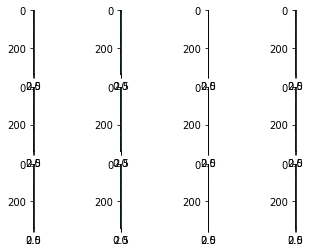

In [122]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(testImg[i])

In [10]:
trainImagesPaths[1] # gives the path to the first image

'/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fc1001932.png'

In [11]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [12]:
# check the length of the training images for confirmation
len(trainImgNParray)

4766

In [13]:
# check the length of labels for confirmation
len(trainlabel)

4766

In [14]:
# checking the shape of the first image.
trainImgNParray[1].shape

(71, 71, 3)

In [15]:
type(trainImgNParray) # verifing the data type

numpy.ndarray

In [16]:
len(trainImagesPaths)

4766

In [17]:
print(trainImagesPaths[0:5])

['/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fab809601.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fc1001932.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fef14b865.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/f39ddbe0a.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fb487c5a4.png']


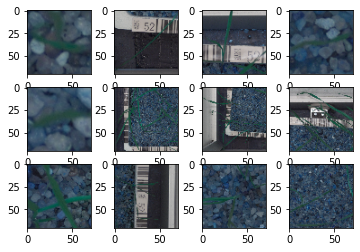

In [18]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(trainImg[i])

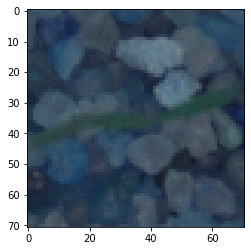

In [19]:
plt.imshow(trainImg[3])

In [20]:
im = trainImg[3]
im.shape

(71, 71, 3)

In [21]:
trainArray[7][0]

'/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/f84089a55.png'

In [22]:
trainArray[7][1]

'Black-grass'

In [25]:
trainArray[8]


['/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/f5ca3d442.png',
 'Black-grass']

In [26]:
trainImgNParray.shape

(4766, 71, 71, 3)

In [27]:
trainlabel.shape

(4766, 1)

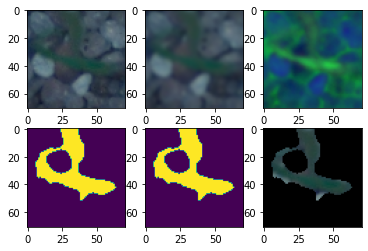

In [28]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without background
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

In [29]:
# normalize the training data
clearTrainImg = clearTrainImg/255

In [33]:
clearTrainImg

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [81]:
encodeTrainLabels.shape


(4766,)

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


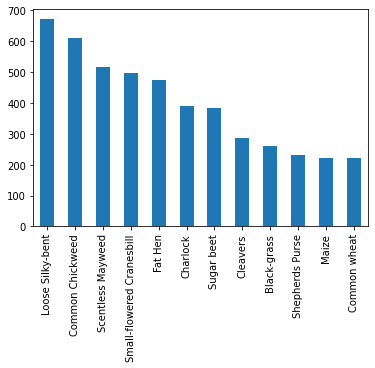

In [34]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

In [35]:
# check the data type of the training images
clearTrainImg.dtype

dtype('float64')

In [37]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

In [38]:
trainY[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Data Augmentation

In [39]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

In [41]:
model = Sequential() 
# 2D Convolution layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
# 2D Convolution layer
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
# 2D Convolution layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# 2D Convolution layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))

#Add Output Layer
model.add(layers.Dense(num_clases, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_B = model
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)        

In [42]:
t0=time.time()
history_B = model_B.fit_generator(datagen.flow(trainX, trainY, batch_size=70), epochs=50, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores_B = model_B.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_B[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
62/62 - 42s - loss: 2.0853 - accuracy: 0.2637 - val_loss: 1.7345 - val_accuracy: 0.3899
Epoch 2/50
62/62 - 41s - loss: 1.6710 - accuracy: 0.3943 - val_loss: 1.4283 - val_accuracy: 0.4969
Epoch 3/50
62/62 - 41s - loss: 1.3974 - accuracy: 0.5129 - val_loss: 1.2270 - val_accuracy: 0.5723
Epoch 4/50
62/62 - 41s - loss: 1.2709 - accuracy: 0.5649 - val_loss: 1.3357 - val_accuracy: 0.5388
Epoch 5/50
62/62 - 42s - loss: 1.2022 - accuracy: 0.5889 - val_loss: 1.0951 - val_accuracy: 0.6268
Epoch 6/50
62/62 - 41s - loss: 1.1045 - accuracy: 0.6260 - val_loss: 1.0893 - val_accuracy: 0.6331
Epoch 7/50
62/62 - 41s - loss: 1.0191 - accuracy: 0.6615 - val_loss: 0.8958 - val_accuracy: 0.7065
Epoch 8/50
62/62 - 41s - loss: 0.9885 - accuracy: 0.6631 - val_loss: 0.8377 - val_accuracy: 0.7086
Epoch 9/50
62/62 - 41s - loss: 0.9179 - accuracy: 0.6929 - val_loss: 0.8020 - val_accuracy: 0.7149
Epoch 10/50
62/62 - 41s - loss: 0.8445 - accuracy: 0.7207 - val_loss: 0.7016 - val_accuracy: 0.7631
Epoch 11/

In [43]:
print(model_B.evaluate(trainX, trainY))  # Evaluate on train set
print(model_B.evaluate(testX, testY))  # Evaluate on test set

135/135 [==============================] - 10s 73ms/step - loss: 0.3542 - accuracy: 0.8697
[0.35421887040138245, 0.869666576385498]
15/15 [==============================] - 1s 73ms/step - loss: 0.4384 - accuracy: 0.8428
[0.43838226795196533, 0.8427672982215881]


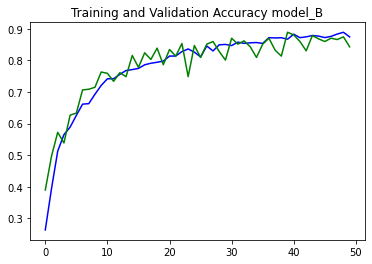

In [44]:
# plot training accuracies
plt.plot(history_B.history['accuracy'],'b') #train acc
plt.plot(history_B.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_B') 
plt.show()

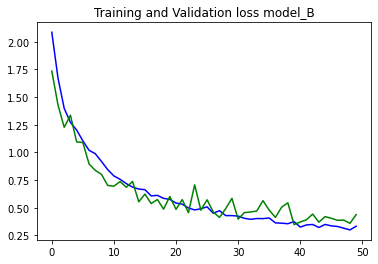

In [45]:
# plot training and validation loss
plt.plot(history_B.history['loss'],'b') #train loss
plt.plot(history_B.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_B') 
plt.show()

In [46]:
model = Sequential()

# Input layer and 2D Con
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3)))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(layers.BatchNormalization())

# 2D Convolution layer
model.add(layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(layers.BatchNormalization())

# 2D Convolution layer
model.add(layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(layers.BatchNormalization())

# 2D Convolution layer
model.add(layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
model.add(layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))

# Normalization layer
model.add(layers.BatchNormalization())

#Add Output Layer
model.add(layers.Dense(12, activation='softmax')) # = 12 predicted classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_A = model
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 69, 69, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)      

In [47]:
t0=time.time()
history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=50), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
86/86 - 66s - loss: 1.9149 - accuracy: 0.3588 - val_loss: 2.9493 - val_accuracy: 0.1405
Epoch 2/35
86/86 - 64s - loss: 1.3044 - accuracy: 0.5542 - val_loss: 4.1166 - val_accuracy: 0.0608
Epoch 3/35
86/86 - 64s - loss: 1.0604 - accuracy: 0.6463 - val_loss: 4.8502 - val_accuracy: 0.0608
Epoch 4/35
86/86 - 64s - loss: 0.8654 - accuracy: 0.7111 - val_loss: 5.1605 - val_accuracy: 0.0776
Epoch 5/35
86/86 - 64s - loss: 0.7779 - accuracy: 0.7414 - val_loss: 5.2063 - val_accuracy: 0.0985
Epoch 6/35
86/86 - 64s - loss: 0.7146 - accuracy: 0.7550 - val_loss: 3.6034 - val_accuracy: 0.0860
Epoch 7/35
86/86 - 64s - loss: 0.6409 - accuracy: 0.7806 - val_loss: 1.3930 - val_accuracy: 0.5409
Epoch 8/35
86/86 - 64s - loss: 0.5711 - accuracy: 0.8037 - val_loss: 0.9405 - val_accuracy: 0.7023
Epoch 9/35
86/86 - 64s - loss: 0.5559 - accuracy: 0.8072 - val_loss: 0.7113 - val_accuracy: 0.7631
Epoch 10/35
86/86 - 64s - loss: 0.4779 - accuracy: 0.8254 - val_loss: 0.6669 - val_accuracy: 0.7631
Epoch 11/

In [48]:
print(model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(model_A.evaluate(testX, testY))  # Evaluate on test set

135/135 [==============================] - 15s 111ms/step - loss: 0.3510 - accuracy: 0.8643
[0.35104918479919434, 0.8643040060997009]
15/15 [==============================] - 2s 112ms/step - loss: 0.4757 - accuracy: 0.8197
[0.4756591320037842, 0.8197064995765686]


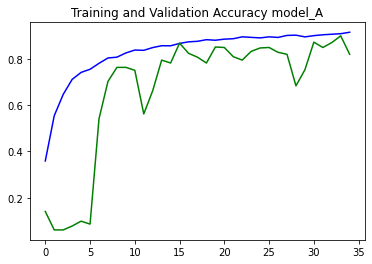

In [49]:
# plot training accuracies
plt.plot(history_A.history['accuracy'],'b') #train acc
plt.plot(history_A.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_A') 
plt.show()

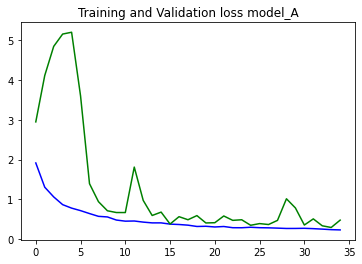

In [50]:
# plot training and validation loss
plt.plot(history_A.history['loss'],'b') #train loss
plt.plot(history_A.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_A') 
plt.show()

In [ ]:
#Prediction

In [ ]:
Predicted_classes = model.predict_classes(testX)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
wrong_preds = testX[Predicted_classes != np.argmax(testY)]

In [ ]:
right_preds = testX[Predicted_classes == np.argmax(testY)]

In [ ]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [51]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(12, activation="softmax"))

# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model1 = model1.fit(x=trainX, y=trainY, batch_size=32, epochs=35, validation_data=(testX, testY))

Epoch 1/35
135/135 [==============================] - 3s 18ms/step - loss: 2.1284 - accuracy: 0.2668 - val_loss: 1.5541 - val_accuracy: 0.4990
Epoch 2/35
135/135 [==============================] - 2s 16ms/step - loss: 1.2651 - accuracy: 0.5776 - val_loss: 1.2370 - val_accuracy: 0.5744
Epoch 3/35
135/135 [==============================] - 2s 16ms/step - loss: 0.9243 - accuracy: 0.6798 - val_loss: 1.2091 - val_accuracy: 0.5975
Epoch 4/35
135/135 [==============================] - 2s 16ms/step - loss: 0.6718 - accuracy: 0.7613 - val_loss: 1.2496 - val_accuracy: 0.5996
Epoch 5/35
135/135 [==============================] - 2s 16ms/step - loss: 0.5010 - accuracy: 0.8407 - val_loss: 1.3486 - val_accuracy: 0.6038
Epoch 6/35
135/135 [==============================] - 2s 16ms/step - loss: 0.3340 - accuracy: 0.8950 - val_loss: 1.3412 - val_accuracy: 0.6122
Epoch 7/35
135/135 [==============================] - 2s 16ms/step - loss: 0.2904 - accuracy: 0.9045 - val_loss: 1.4614 - val_accuracy: 0.6247

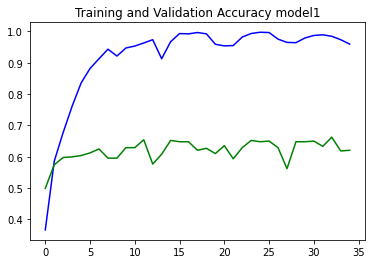

In [52]:

# plot training accuracies
plt.plot(model1.history['accuracy'],'b') #train acc
plt.plot(model1.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model1') 
plt.show()

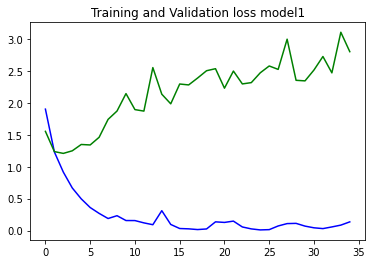

In [53]:
# plot training accuracies
plt.plot(model1.history['loss'],'b') #train acc
plt.plot(model1.history['val_loss'],'g') #val acc
plt.title('Training and Validation loss model1') 
plt.show()

In [61]:
len(clearTrainImg), clearTrainImg.shape

(4766, (4766, 71, 71, 3))

In [57]:
n_samples = len(clearTrainImg)
clearTrainImg_flatten = clearTrainImg.reshape((n_samples, -1))

In [82]:
clearTrainImg_flatten.shape, encodeTrainLabels.shape

((4766, 15123), (4766,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(clearTrainImg_flatten,encodeTrainLabels)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(3574, 15123), (3574,)
Test data and target sizes: 
(1192, 15123), (1192,)


In [84]:
from sklearn import datasets, svm, metrics
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
y_pred = classifier.predict(X_test)

In [86]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.59      0.82      0.69       100
           2       0.62      0.22      0.33        68
           3       0.47      0.71      0.57       143
           4       0.50      0.02      0.03        64
           5       0.37      0.44      0.40       115
           6       0.55      0.87      0.67       158
           7       0.71      0.18      0.28        57
           8       0.33      0.47      0.39       129
           9       0.57      0.07      0.12        57
          10       0.73      0.76      0.75       131
          11       0.66      0.47      0.55       112

    accura

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
import pickle 
# Save the trained model as a pickle string.
saved_model_CNN = pickle.dumps(model)

TypeError: ignored

In [ ]:
# Load the pickled model
CNN_from_pickle = pickle.loads(saved_model_CNN) 
# Use the loaded pickled model to make predictions
CNN_from_pickle.predict(X_test)

In [ ]:

#2
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [92]:
2

2